In [1]:
!pip install pymongo

In [2]:
# Imports
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [3]:
!pip install scikit-surprise

In [4]:
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.sparse import csr_matrix
from surprise import BaselineOnly, SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import KNNBasic, KNNWithMeans, NMF
from sklearn.neighbors import KNeighborsRegressor
from surprise.model_selection import GridSearchCV
import time


In [5]:
import nltk
import spacy

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Habiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
!python -m spacy download fr_core_news_sm

     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
     -- ------------------------------------- 1.0/16.3 MB 5.6 MB/s eta 0:00:03
     ------ --------------------------------- 2.6/16.3 MB 7.6 MB/s eta 0:00:02
     ----------- ---------------------------- 4.7/16.3 MB 8.4 MB/s eta 0:00:02
     ---------------- ----------------------- 6.8/16.3 MB 8.9 MB/s eta 0:00:02
     ---------------------- ----------------- 9.2/16.3 MB 9.4 MB/s eta 0:00:01
     ---------------------------- ----------- 11.5/16.3 MB 9.8 MB/s eta 0:00:01
     ---------------------------------- ----- 13.9/16.3 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------  16.3/16.3 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------- 16.3/16.3 MB 9.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [9]:
# Open and read the BSON files
with open("./trictrac/details.bson", "rb") as f:
    details = bson.decode_all(f.read())


with open("./trictrac/infos_scrapping.bson", "rb") as f:
    infos = bson.decode_all(f.read())

with open("./trictrac/jeux.bson", "rb") as f:
    jeux = bson.decode_all(f.read())


with open("./trictrac/avis.bson", "rb") as f:
    avis = bson.decode_all(f.read())

In [202]:
len_details=len(details)
len_jeux=len(jeux)
len_infos=len(infos)
len_avis=len(avis)
print(f"Longeur de chaque table de donn√©es avis: {len_avis}, jeux: {len_jeux}, infos: {len_infos}, details : {len_details}")


Longeur de chaque table de donn√©es avis: 246524, jeux: 20235, infos: 532, details : 20234


In [235]:
pdDetails = pd.DataFrame(details)
pdJeux = pd.DataFrame(jeux)
pdInfos = pd.DataFrame(infos)
pdAvis = pd.DataFrame(avis)

In [236]:
pdAvis = pd.DataFrame(avis)
print("\nAvis:\n", pdAvis.describe())


Avis:
                note
count  246524.00000
mean        7.59307
std         2.12589
min         0.00000
25%         6.00000
50%         8.00000
75%         9.40000
max        10.00000


In [237]:
pdAvis.head()

_id              author       date_published  \
0  63c6726ea81f3e3016af9a56  Monsieur Guillaume  2021-01-27 11:06:44   
1  63c6726ea81f3e3016af9a57          morlockbob  2020-10-18 10:04:21   
2  63c6726ea81f3e3016af9a58              SwatSh  2021-02-01 08:35:08   
3  63c6726ea81f3e3016af9a59     Timi JeuxATheme  2020-11-19 17:04:57   
4  63c6726ea81f3e3016af9a5a           prunelles  2021-05-24 12:43:18   

                          title_review  note  \
0  Voyages sur les ailes des papillons   8.0   
1             le festival de Michoacan   7.0   
2     Vivez la migration des monarques   7.0   
3                                  Bon   8.0   
4                          Envolez-moi   9.0   

                                         review_href      title  \
0   https://www.trictrac.net/avis/vraiment-bon-12514  Mariposas   
1  https://www.trictrac.net/avis/le-festival-de-m...  Mariposas   
2  https://www.trictrac.net/avis/vivez-la-migrati...  Mariposas   
3                                               None  Mariposas   
4          https://www.trictrac.net/avis/envolez-moi  Mariposas   

                                                 url  treated  \
0  https://www.trictrac.net/jeu-de-societe/maripo...     True   
1  https://www.trictrac.net/jeu-de-societe/maripo...     True   
2  https://www.trictrac.net/jeu-de-societe/maripo...     True   
3  https://www.trictrac.net/jeu-de-societe/maripo...     True   
4  https://www.trictrac.net/jeu-de-societe/maripo...     True   

                                             comment  
0  Lorsque le jeu est jeu, bon, r√©flexif, joli po...  
1  Comment continuer apr√®s un mega hit¬†? Simpleme...  
2  Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ...  
3                                                NaN  
4  Tr√®s joli bijou que ce jeu-l√† ! Le mat√©riel, l...

In [238]:
print(pdAvis.loc[0, "comment"])  # Affiche le premier commentaire

Lorsque le jeu est jeu, bon, r√©flexif, joli pour qui est sensible √† ce style d'illustration... Lorsque l'on a envie d'y rejouer encore pour essayer autrement, et revivre cette histoire de papillons et de voyages... Et lorsqu'en plus, au d√©tour des r√®gles, on s'int√©resse √©galement au propos et √† la sensibilisation, l√©g√®re comme les ailes du dit-papillons et pourtant aussi bien amen√©, alors effectivement, il y a l√† un tr√®s bon jeu, ludiquement parlant (et il est possible de s'arr√™ter l√†) mais √©galement tr√®s bon pour l'ouverture des yeux des joueuses et joueurs au monde qui nous entoure... √áa, c'est deux fois bon !


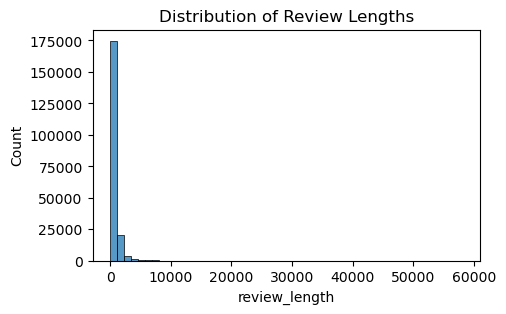

Average review length: 619 characters


In [239]:
pdAvis['review_length'] = pdAvis['comment'].str.len()

plt.figure(figsize=(5, 3))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

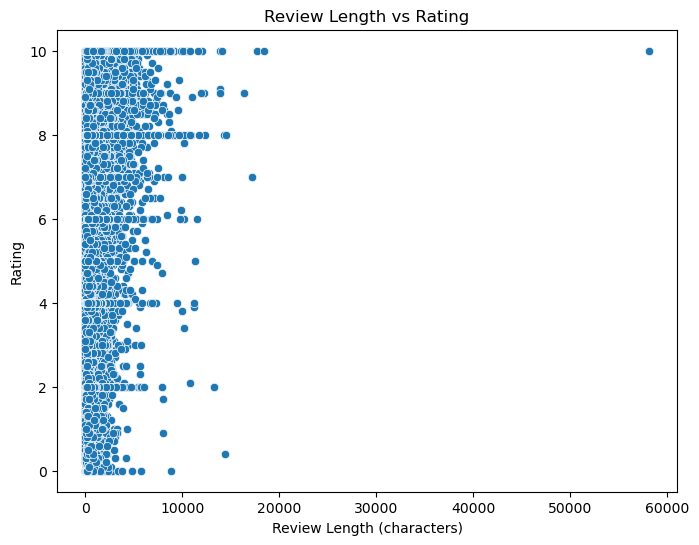

In [240]:
# Analyze if review length correlates with rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pdAvis, x='review_length', y='note')
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.show()

In [241]:
#2 reviews with around 60000 words that arent interesting to keep (they are spam)
pdAvis[pdAvis["review_length"] >50000]

_id               author       date_published  \
22193  63c67506993b727dc2a7a3a6  The Lonesome Meeple  2020-04-16 18:24:56   
79884  63c6776e993b727dc2a88501  The Lonesome Meeple  2020-04-16 18:24:56   

                                            title_review  note  \
22193  Histoire de Meeples #1 Sub Terra [Partie narra...  10.0   
79884  Histoire de Meeples #1 Sub Terra [Partie narra...  10.0   

                                             review_href      title  \
22193  https://www.trictrac.net/avis/sub-terra-partie...  Sub Terra   
79884  https://www.trictrac.net/avis/sub-terra-partie...  Sub Terra   

                                                     url  treated  \
22193  https://www.trictrac.net/jeu-de-societe/sub-te...     True   
79884  https://www.trictrac.net/jeu-de-societe/sub-te...     True   

                                                 comment  review_length  
22193  R√©cit √† retrouver sur mon blog Histoires de Me...        58097.0  
79884  R√©cit √† retrouver sur mon blog Histoires de Me...        58097.0

In [242]:
pdAvis[pdAvis["author"]== "The Lonesome Meeple"]

_id               author       date_published  \
21474  63c67500993b727dc2a7a0d7  The Lonesome Meeple  2020-04-21 22:32:46   
22193  63c67506993b727dc2a7a3a6  The Lonesome Meeple  2020-04-16 18:24:56   
79884  63c6776e993b727dc2a88501  The Lonesome Meeple  2020-04-16 18:24:56   
84272  63c67799993b727dc2a89625  The Lonesome Meeple  2020-04-21 22:32:46   

                                            title_review  note  \
21474  Histoire de Meeples #4 SOS Dino |Partie Narrat...  10.0   
22193  Histoire de Meeples #1 Sub Terra [Partie narra...  10.0   
79884  Histoire de Meeples #1 Sub Terra [Partie narra...  10.0   
84272  Histoire de Meeples #4 SOS Dino |Partie Narrat...  10.0   

                                             review_href      title  \
21474  https://www.trictrac.net/avis/histoire-de-meep...   SOS DINO   
22193  https://www.trictrac.net/avis/sub-terra-partie...  Sub Terra   
79884  https://www.trictrac.net/avis/sub-terra-partie...  Sub Terra   
84272  https://www.trictrac.net/avis/histoire-de-meep...   SOS DINO   

                                                     url  treated  \
21474  https://www.trictrac.net/jeu-de-societe/sos-di...     True   
22193  https://www.trictrac.net/jeu-de-societe/sub-te...     True   
79884  https://www.trictrac.net/jeu-de-societe/sub-te...     True   
84272  https://www.trictrac.net/jeu-de-societe/sos-di...     True   

                                                 comment  review_length  
21474  R√©cit √† retrouver avec photos sur mon blog His...        12044.0  
22193  R√©cit √† retrouver sur mon blog Histoires de Me...        58097.0  
79884  R√©cit √† retrouver sur mon blog Histoires de Me...        58097.0  
84272  R√©cit √† retrouver avec photos sur mon blog His...        12044.0

In [243]:
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (246524, 11)


In [244]:
pdAvis=pdAvis[pdAvis["review_length"] != 58097.0]
print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis apr√®s nettoyage : (246522, 11)


In [245]:
#enlever les doublons
pdAvis = pdAvis.copy()
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
pdAvis.drop_duplicates(subset=['author', 'date_published', 'title_review', 'note', 'review_href', 'title', 'url', 'treated', 'comment' , 'review_length'], inplace=True)
print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (246522, 11)
Dimensions de pdAvis apr√®s nettoyage : (176242, 11)


In [246]:
# Supprimer les lignes o√π 'comment' est NaN ou vide
pdAvis.dropna(subset=['comment'], inplace=True)
print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis apr√®s nettoyage : (150723, 11)


In [247]:
# Optionnel : enlever aussi les commentaires vides (juste espaces)
pdAvis = pdAvis[pdAvis['comment'].str.strip() != ""]
print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis apr√®s nettoyage : (142845, 11)


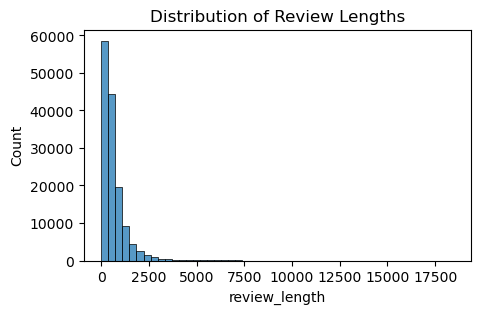

Average review length: 640 characters


In [248]:
#We redid the statistcs about the review length to verify, all is good,the highest review is real
plt.figure(figsize=(5, 3))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

In [249]:
comment_counts = pdAvis["title"].value_counts()
print(comment_counts)


title
Shogun                                 166
Carcassonne - Die J√§ger und Sammler    150
Jeu de Cochons                         148
Dune                                   148
La Citt√†                               148
                                      ... 
Warhammer patrouilles                    1
Praetoria Prima                          1
Thalie                                   1
Jason                                    1
Liar's dice                              1
Name: count, Length: 10341, dtype: int64


In [250]:
# Filtrer les jeux avec au moins 2 commentaires --> Difficile √† recommander intelligemment (trop peu d‚Äôinfos)
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
game_counts = pdAvis['title'].value_counts()
valid_games = game_counts[game_counts >= 2].index
pdAvis = pdAvis[pdAvis['title'].isin(valid_games)]
print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (142845, 11)
Dimensions de pdAvis apr√®s nettoyage : (140157, 11)


In [251]:
lis = pdAvis["author"].value_counts()
print(len(lis[lis == 3]))

862


In [28]:
# Filtrer les utilisateurs avec au moins 3 commentaires --> On ne peut pas calculer sa similarit√© avec d'autres utilisateurs
#on veut que le knn soient trouve des voisins reellement similaires
#print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
#user_counts = pdAvis['author'].value_counts()
#valid_users = user_counts[user_counts >= 2].index
#pdAvis = pdAvis[pdAvis['author'].isin(valid_users)]
#print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (140157, 11)
Dimensions de pdAvis apr√®s nettoyage : (135605, 11)


In [32]:
df_notes_basses = pdAvis[pdAvis["note"] <= 6]  # Filtrer les notes ‚â§ 6
# Afficher quelques commentaires n√©gatifs
print(df_notes_basses[["note", "comment_clean"]].head(10))

     note                                      comment_clean
13    6.0  d√©√ßu Mariposas \n tendance Wingspan auteur pou...
17    3.0  bel promesse papier jeu final beaucoup d√©√ßu si...
36    6.0  cause you don' need anything \n\n mysterium ai...
53    1.0  jeu magnifiquement bo√Æte logement bien concevo...
57    6.0  bien neuf clair lune \n mise place jeu int√©res...
78    6.0  d√©√ßu jeu avis bon lancer meeple amusant m√©cani...
103   2.0  jeu Not jeu 3 4 vraiment int√©ressant extension...
119   5.0  bonbon ludique   bel impatiemment   coup buzz ...
137   5.0  hasard tirage clone faille cher deckbuilding t...
205   5.0  grand fan Troyes amateur Roll Write bien s√ªr t...


**meme chose que dans l'autre fichier de la partie 1**

In [36]:
# Imports
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from scipy.sparse import csr_matrix



###################################################################################################



def minipingpong(sparse_matrix, allusers, allgames, min_ratings_users, min_ratings_games, max_iterations=10, plot=True):
    matrix = sparse_matrix.tocoo()
    users = np.array(allusers)
    games = np.array(allgames)
    iteration = 0
    while iteration < max_iterations:
        game_ratings = np.bincount(matrix.col, minlength=len(games))
        user_ratings = np.bincount(matrix.row, minlength=len(users))

        valid_games = np.where(game_ratings >= min_ratings_games)[0]

        valid_users = np.where(user_ratings >= min_ratings_users)[0]

        keep = np.isin(matrix.row, valid_users) & np.isin(matrix.col, valid_games)

        new_row = matrix.row[keep]
        new_col = matrix.col[keep]
        new_data = matrix.data[keep]

        # Update row and column indices to match new dimensions
        row_mapping = {old: new for new, old in enumerate(valid_users)}
        col_mapping = {old: new for new, old in enumerate(valid_games)}

        new_row = np.array([row_mapping[r] for r in new_row])
        new_col = np.array([col_mapping[c] for c in new_col])

        # Create the new matrix
        matrix = csr_matrix((new_data, (new_row, new_col)),
                           shape=(len(valid_users), len(valid_games)))
        # Convert back to COO for next iteration
        matrix = matrix.tocoo()

        # Update user and game lists
        users = users[valid_users]
        games = games[valid_games]
        iteration += 1

    final_matrix = matrix.tocsr()

    return final_matrix

###################################################################################################


def subtract_mean(cleaned_matrix):
    data_array = cleaned_matrix.toarray()

    user_means = []
    for i in range(data_array.shape[0]):
        user_ratings = data_array[i, :]
        non_zero_indices = user_ratings != 0
        user_ratings_non_zero = user_ratings[non_zero_indices]

        if len(user_ratings_non_zero) > 0:
            user_means.append(user_ratings_non_zero.mean())
        else:
            user_means.append(0)

    # Create a new matrix with normalized ratings
    normalized_data = []
    normalized_rows = []
    normalized_cols = []

    cleaned_matrix_coo = cleaned_matrix.tocoo()
    # For each non-zero entry in the original matrix, subtract user mean
    for i, j, v in zip(cleaned_matrix_coo.row, cleaned_matrix_coo.col, cleaned_matrix_coo.data):
        normalized_value = v - user_means[i]
        normalized_data.append(normalized_value)
        normalized_rows.append(i)
        normalized_cols.append(j)

    # Create new sparse matrix with normalized values
    normalized_matrix = csr_matrix(
        (normalized_data, (normalized_rows, normalized_cols)),
        shape=cleaned_matrix.shape
    )
    return normalized_matrix


###################################################################################################

def custom_train_test_split(sparse_matrix, test_size=0.2, max_user_loss=0.5, max_game_loss=0.5):

    np.random.seed(42)

    coo_matrix = sparse_matrix.tocoo()

    # Total number of ratings
    n_ratings = coo_matrix.data.size
    n_users = sparse_matrix.shape[0]
    n_games = sparse_matrix.shape[1]

    # Count ratings per user and per game
    user_ratings = np.bincount(coo_matrix.row, minlength=n_users)
    game_ratings = np.bincount(coo_matrix.col, minlength=n_games)

    # Calculate maximum allowed test ratings per user and game
    max_test_per_user = np.floor(user_ratings * max_user_loss).astype(int)
    max_test_per_game = np.floor(game_ratings * max_game_loss).astype(int)

    # Initialize counters for test ratings per user and game
    test_per_user = np.zeros(n_users, dtype=int)
    test_per_game = np.zeros(n_games, dtype=int)

    # Create a random permutation of rating indices
    rating_indices = np.random.permutation(n_ratings)

    # Initialize train and test masks
    train_mask = np.ones(n_ratings, dtype=bool)
    test_mask = np.zeros(n_ratings, dtype=bool)

    # Target number of test ratings
    n_test_target = int(test_size * n_ratings)
    n_test_selected = 0

    # Iterate through ratings in random order
    for idx in rating_indices:
        user = coo_matrix.row[idx]
        game = coo_matrix.col[idx]

        # Check if we can add this rating to test set without violating constraints
        if (test_per_user[user] < max_test_per_user[user] and
            test_per_game[game] < max_test_per_game[game] and
            n_test_selected < n_test_target):

            # Add to test set
            train_mask[idx] = False
            test_mask[idx] = True

            # Update counters
            test_per_user[user] += 1
            test_per_game[game] += 1
            n_test_selected += 1

    # Create train and test matrices
    train_matrix = csr_matrix(
        (coo_matrix.data[train_mask],
         (coo_matrix.row[train_mask], coo_matrix.col[train_mask])),
        shape=sparse_matrix.shape
    )

    test_matrix = csr_matrix(
        (coo_matrix.data[test_mask],
         (coo_matrix.row[test_mask], coo_matrix.col[test_mask])),
        shape=sparse_matrix.shape
    )

    # Print statistics
    print(f"Split complete: {n_test_selected} ratings ({n_test_selected/n_ratings:.2%}) in test set")
    print(f"Train set: {train_matrix.nnz} ratings, Test set: {test_matrix.nnz} ratings")

    # Check if any users or games lost too many ratings
    users_with_ratings = np.where(user_ratings > 0)[0]
    games_with_ratings = np.where(game_ratings > 0)[0]

    max_user_loss_actual = np.max(test_per_user[users_with_ratings] / user_ratings[users_with_ratings])
    max_game_loss_actual = np.max(test_per_game[games_with_ratings] / game_ratings[games_with_ratings])

    print(f"Maximum user ratings loss: {max_user_loss_actual:.2%}")
    print(f"Maximum game ratings loss: {max_game_loss_actual:.2%}")

    return train_matrix, test_matrix, train_mask, test_mask

##################################################################################################################################################################

#Baseline models


# Model 1: Global Mean Baseline
def global_mean_baseline(train_matrix,test_matrix):
    """Simplest baseline: predict global mean rating for all users and items"""
    global_mean = train_matrix.data.mean()
    test_rows, test_cols = test_matrix.nonzero()

    # For evaluating on test data
    predictions = np.full_like(test_matrix.data, global_mean)

    rmse = np.sqrt(mean_squared_error(predictions, test_matrix.data))
    mae = mean_absolute_error(predictions, test_matrix.data)
    r2 = r2_score(predictions, test_matrix.data)

    print(f"Global Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return global_mean, rmse, mae , r2


# Model 2: User Mean Baseline
def user_mean_baseline(train_matrix, test_matrix):
    # Get user means from training data
    n_users = train_matrix.shape[0]
    test_rows, test_cols = test_matrix.nonzero()

    # Calculate mean rating for each user (row)
    user_means = np.zeros(n_users)
    for u in range(n_users):
        row = train_matrix.getrow(u)
        if row.nnz > 0:  # If user has any ratings
            user_means[u] = row.data.mean()

    # Make sure test_rows values are within bounds
    valid_indices = [i for i, row in enumerate(test_rows) if row < n_users]

    if len(valid_indices) < len(test_rows):
        print(f"Warning: {len(test_rows) - len(valid_indices)} test entries had out-of-bounds user indices")

    # Use only valid indices
    test_rows_valid = test_rows[valid_indices]
    test_cols_valid = test_cols[valid_indices]
    test_data_valid = test_matrix.data[valid_indices]

    # Make predictions for test data
    predictions = np.array([user_means[row] for row in test_rows_valid])

    # Ensure predictions and test data have same length
    assert len(predictions) == len(test_data_valid), "Predictions and test data must have same length"

    rmse = np.sqrt(mean_squared_error(predictions, test_data_valid))
    mae = mean_absolute_error(predictions, test_data_valid)
    r2 = r2_score(predictions,test_data_valid )

    print(f"User Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return user_means, rmse, mae, r2

# Model 3: Game Mean Baseline
def item_mean_baseline(train_matrix, test_matrix):
    # Calculate mean rating for each item/game (column)
    n_items = train_matrix.shape[1]
    item_means = np.zeros(n_items)
    test_rows, test_cols = test_matrix.nonzero()

    # Get mean of each column (item), accounting for sparsity
    for i in range(n_items):
        col = train_matrix.getcol(i)
        if col.nnz > 0:  # If item has any ratings
            item_means[i] = col.data.mean()

    # Make sure test_cols values are within bounds
    valid_indices = [i for i, col in enumerate(test_cols) if col < n_items]

    if len(valid_indices) < len(test_cols):
        print(f"Warning: {len(test_cols) - len(valid_indices)} test entries had out-of-bounds item indices")

    # Use only valid indices
    test_rows_valid = test_rows[valid_indices]
    test_cols_valid = test_cols[valid_indices]
    test_data_valid = test_matrix.data[valid_indices]

    # Make predictions for test data
    predictions = np.array([item_means[col] for col in test_cols_valid])

    # Ensure predictions and test data have same length
    assert len(predictions) == len(test_data_valid), "Predictions and test data must have same length"

    rmse = np.sqrt(mean_squared_error(predictions, test_data_valid))
    mae = mean_absolute_error(predictions, test_data_valid)
    r2 = r2_score(predictions, test_data_valid)

    print(f"Item Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return item_means, rmse, mae, r2

In [37]:
pdAvis['review_length'] = pdAvis['comment'].str.len()
pdAvis=pdAvis[pdAvis["review_length"] != 58097.0]

#Duplicates removable
pdAvis.drop_duplicates(subset=['author','title_review','note','title','comment'], inplace=True)
pdJeux.drop_duplicates(subset=['title',	'href','avis'], inplace=True)


allgames = sorted(pdJeux["title"].unique())
allusers = sorted(pdAvis['author'].unique())


# Cr√©ation de la dataFrame
ratings_matrix = pd.DataFrame(
    index=allusers,
    columns=allgames,
    dtype=float
)

# Remplissage de la matrice avec les notes
for _, row in pdAvis.iterrows():
    ratings_matrix.at[row['author'], row['title']] = row['note']

# Conversion en matrice sparse
mask = ~ratings_matrix.isna()
sparse_ratings_matrix = csr_matrix(
    (
        ratings_matrix.values[mask],
        np.where(mask)
    ),
    shape=ratings_matrix.shape
)

# Remove users and games with with low numbers of ratings the optimal value found was (14,18)
cleaned_matrix = minipingpong(sparse_ratings_matrix, allusers, allgames, 14, 18)

In [38]:
# Convert the cleaned_matrix data to Surprise format
ratings_list = []
for i, j in zip(*cleaned_matrix.nonzero()):
    user = allusers[i]
    game = allgames[j]
    rating = cleaned_matrix[i, j]
    ratings_list.append((user, game, rating))


ratings_df = pd.DataFrame(ratings_list, columns=['userID', 'itemID', 'rating'])

# Define the reader with appropriate rating scale
reader = Reader(rating_scale=(0, 10))

# Create a Surprise dataset
data = Dataset.load_from_df(ratings_df, reader)
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)



knn_basic = KNNBasic(k=50, sim_options={'name': 'pearson', 'user_based': True}) # After testing 40 was the best k neighbors found
knn_means = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': True})


knn_basic.fit(trainset)
knn_means.fit(trainset)


preds_basic = knn_basic.test(testset)
preds_means = knn_means.test(testset)

rmse_knn_basic = accuracy.rmse(preds_basic)
mae_knn_basic = accuracy.mae(preds_basic)
rmse_knn_means = accuracy.rmse(preds_means)
mae_knn_means = accuracy.mae(preds_means)
y_true = [pred.r_ui for pred in preds_basic]
y_pred_basic = [pred.est for pred in preds_basic]
y_pred_means = [pred.est for pred in preds_means]
r2_knn_basic = r2_score(y_true, y_pred_basic)
r2_knn_means = r2_score(y_true, y_pred_means)


knn_results = pd.DataFrame({
    'Model': ['KNNBasic (Suprise)', 'KNNWithMeans (Suprise)'],
    'RMSE': [rmse_knn_basic, rmse_knn_means],
    'MAE': [mae_knn_basic, mae_knn_means],
    'R2 score': [r2_knn_basic, r2_knn_means]
})

# Combine with previous results
results = knn_results

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.9802
MAE:  1.5614
RMSE: 1.9047
MAE:  1.4755


**j'ai fait juste cette fonction pour retourner les top predictions pour chaque utilisateurs (on pourrait juste ajouter cette fonction dans l'autre fichier de la partie knn**

In [71]:
def get_top_n_predictions(predictions, n=10):
    """
    Return the top-N recommended items for each user from a set of predictions.
    """

    # First map the predictions to each user.
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the N highest ones.
    #on trie les items recommand√©s par note pr√©dite (la plus √©lev√©e en premier) et on garde les n premiers jeux.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [125]:
top_n = get_top_n_predictions(preds_means, n=5)

In [126]:
# Print the recommended items for the first couple of users
first_couple_users = list(top_n.keys())[:20]  # Adjust the number to select the first N users

for uid in first_couple_users:
    user_ratings = top_n[uid]
    print(f"Recommendations for user {uid}: {[iid for (iid, _) in user_ratings]}")

Recommendations for user Bloublou: ['Aladdin et le tapis volant', 'ASL : Starter Kit  #3', 'Antagon', 'Apache']
Recommendations for user GrayVice: ['Aladin', 'Bataille corse', 'Austerlitz 1805 - Partie Sud', 'Batameuh', 'Babylon 5 Component Game System : Core Sets']
Recommendations for user Dedal: ["Batt'l Kha'os", 'A Touch of Evil : The Allies', 'Bataflash', 'Battletech Technical Readout 3050', 'Battle-cry']
Recommendations for user Amarante: ['Atlantis Rising', 'A4', 'Banking', 'Age of Steam : Expansions France & Italy', 'Atlanteon']
Recommendations for user Geoff: ['Airpoly', 'African Queen', 'Banana Jump', '7 Fallen', 'Badaboum !']
Recommendations for user CCCP: ['Atlantis Rising', '7 wonders : Louis', 'Arche Extra Mix', 'Army of Darkness Card Game : Hail to the King', 'Barbarians of Lemuria']
Recommendations for user Bubu_: ['ASL : Croix de Guerre', 'ASL : Kampfgruppe Peiper II', 'Alsace', "Age of Empires III : L'√¢ge des d√©couvertes", 'Aspern-Essling']
Recommendations for user G

# **extraire pour un jeu (Shogun) et un utilisateur (sheewi) ses voisins et leurs comentaires**

In [ ]:
def filter_comments_by_word_count(comments, min_word_count):
    """
    Filters a list of comments to include only those with a word count greater or equal to min_word_count.
    
    Args:
    comments (list of str): A list of comments.
    min_word_count (int): The minimum number of words required for a comment to be included in the return list.
    
    Returns:
    list of str: A list containing only comments that meet or exceed the word count requirement.
    """
    # Filter comments based on word count
    filtered_comments = [comment for comment in comments if len(comment.split()) >= min_word_count]
    return filtered_comments

In [ ]:
def get_top_comments(user_id, game_title, N, word_count_threshold):
    """
    Retrieves the top N comments from the nearest neighbors of a specified user about a specific game,
    using the KNNWithZScore algorithm from Surprise. Only comments with a word count above a certain threshold are considered.
    Expands the search if initial neighbors have not commented on the game. Includes the rank of each commenting user based on proximity.

    Args:
    user_id (str): The user ID of the interested user.
    game_title (str): The title of the game for which comments are being retrieved.
    N (int): The number of top comments to return based on relevance.
    word_count_threshold (int): The minimum number of words required for comments to be considered.

    Returns:
    list of tuples: A list containing tuples of (rank, author, comment) if available, or a status message.
    """
    try:
        # Retrieve inner ID of the user
        user_inner_id = trainset.to_inner_uid(user_id)
    except ValueError:
        return f"No data available for the user ID '{user_id}'."

    try:
        # Retrieve inner ID of the game
        game_inner_id = trainset.to_inner_iid(game_title)
    except ValueError:
        return f"No data available for the game '{game_title}'."

    # Initialize variables for searching neighbors and tracking unique comments
    k = 20
    max_neighbors = trainset.n_users  # Maximum possible neighbors
    found_comments = []
    processed_neighbor_ids = set()  # Set to track processed neighbors

    # Retrieve neighbors and expand search until enough comments are found or all users are checked
    while len(found_comments) < N and k <= max_neighbors:
        # Retrieve the k nearest neighbors of the user
        neighbors = algo.get_neighbors(user_inner_id, k=k)
        # Convert inner IDs of the neighbors back to raw IDs and store with ranks
        neighbors_with_ranks = [(rank + 1, trainset.to_raw_uid(inner_id)) for rank, inner_id in enumerate(neighbors) if trainset.to_raw_uid(inner_id) not in processed_neighbor_ids]

        # Filter the dataset to find the neighbors who have rated the specified game
        for rank, neighbor_id in neighbors_with_ranks:
            if neighbor_id not in processed_neighbor_ids:
                processed_neighbor_ids.add(neighbor_id)
                neighbor_comments = data_cleaned[(data_cleaned['author'] == neighbor_id) & (data_cleaned['title'] == game_title)]
                # Apply enhanced word count filter
                valid_comments = filter_comments_by_word_count(neighbor_comments['comment'].tolist(), word_count_threshold)
                for comment in valid_comments:
                    found_comments.append((rank, neighbor_id, comment))

        # Increase the number of neighbors for the next iteration if necessary
        k += 20

    # If comments are found, sort them by length and return the top N
    if found_comments:
        found_comments.sort(key=lambda x: len(x[2]), reverse=True)  # Sort by comment length
        return found_comments[:N]
    else:
        return f"No comments found for the game '{game_title}' from nearest neighbors that meet the word threshold."

In [361]:
jeu = "Shogun"
utilisateur = "sheewi"

In [267]:
#from surprise.prediction_algorithms.knns import KNNWithZScore

reader = Reader(rating_scale=(1, 10))  # Assuming rating scale is from 1 to 10
dataa = Dataset.load_from_df(pdAvis[['author', 'title', 'note']], reader)
trainset2 = dataa.build_full_trainset()
knn_means = KNNWithMeans(sim_options={'name': 'pearson', 'user_based': True}, k=50, min_k=1)
knn_means.fit(trainset2)

def get_neighbors(user_name, game_title, k=50):
    # Retrieve inner ID of the user
    user_inner_id = trainset2.to_inner_uid(user_name)
    
    # Retrieve inner ID of the game
    try:
        game_inner_id = trainset2.to_inner_iid(game_title)
    except ValueError:
        return f"No data available for the game '{game_title}'."
    
    # Retrieve the k nearest neighbors of the user
    neighbors = knn_means.get_neighbors(user_inner_id, k)
    # Convert inner IDs of the neighbors back to raw IDs
    neighbors_ids = [trainset2.to_raw_uid(inner_id) for inner_id in neighbors]
    print(neighbors_ids)
    # Filter the dataset to find the neighbors who have rated the specified game
    filtered_comments = pdAvis[(pdAvis['author'].isin(neighbors_ids)) & (pdAvis['title'] == game_title)]
    print("Nombre de voisins ayant comment√© ce jeu :", len(filtered_comments))
    
    
    # Collect and return usernames and their comments on the specified game
    return filtered_comments[['author', 'note', 'comment']].values.tolist()

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [363]:
neighbors_comments = get_neighbors(utilisateur, jeu, k=50)

['Yzarc', 'limp', 'ijonesjeux', 'morlockbob', 'Pac', 'PtitJu', 'cmsy', 'samuel2277', 'Sicander vincit', 'PROPHETTE', 'pepetteuh', 'Atanaheim', 'rugal', 'starvince', 'voxmetalis', 'RickyPimous', 'serraangel', 'Monsieur Guillaume', 'SwatSh', 'prunelles', 'BSI40', 'kakawette', 'axelian73', 'MisTeR ToON', 'Lilly', 'letroyenfou', 'Tostaky37', 'Emp√©docle', 'lenantaisdemontelimar', 'AtomChris', 'Ricardo31', 'Player One', 'expliquemoica', 'koala von koala', 'Madame Mathilde', 'Antoinette', 'le.meeple.jaune', 'grotesk', 'Jones', 'bunnypookah', 'Greta', 'Hagrael', 'zeibacker', 'boscouzareix', 'John L√©nine', 'AkoaTujou', 'PapaJeux', 'El Lorenzo207', 'plumesdanges', 'Didi5962']
Nombre de voisins ayant comment√© ce jeu : 12


In [364]:
for cmt in neighbors_comments:
    print(cmt)
    print()

['PtitJu', 8.0, 'Les + :Le mat√©riel (dont un plateau r√©versible)Le principe de la tourRiches des m√©canismes (ordre du tour, programmation (avec connaissance des 5 premi√®res actions jou√©es), r√©solution des combats (la tour), r√©volte, gestion de ses provinces, ses coffres et du riz, ‚Ä¶)Les - : Erreurs dans la r√®gle en fran√ßaisMise en place un peu longue (et pas sur n‚Äôimporte quelle table !)Seulement 6 tours mais 2 heures quand m√™meDonc : Je pr√©f√®re le hasard de la tour de Shogun aux lancers de d√©s d‚ÄôInvasions.En tout cas, on ne voit pas le temps passer.']

['limp', 8.0, "Difficile de trancher vraiment sur ce jeu, quoi que, je m'y essaie.Shogun est un tr√®s bon jeu, c'est ind√©niable.Shogun n'est pas aussi compliqu√© qu'il y parait non plus. Pour autant, il est riche, et les choix √† faire seront nombreux.Le hasard des combats est une v√©ritable trouvaille, aussi bien dans la r√©alisation de la tour que dans le m√©canisme lui-m√™me. Ca permettra d'ajouter du fun et un pe

In [256]:
pdAvis["title"].value_counts()

title
Shogun                                  166
Carcassonne - Die J√§ger und Sammler     150
ARENA - Roma II                         148
La Citt√†                                148
Jeu de Cochons                          148
                                       ... 
Kapit√§n Wackelpudding                     2
Dobble Beach                              2
Haut les cubes !                          2
Vold√©tour extension                       2
Last Night On Earth : Zombie Pillage      2
Name: count, Length: 7653, dtype: int64

In [369]:
pdAvis[(pdAvis["title"]== jeu)]

_id       author       date_published  \
200018  63c67f37993b727dc2aa5a47       PtitJu  2008-01-22 12:28:48   
200019  63c67f37993b727dc2aa5a48      Guyomar  2007-02-13 12:28:45   
200020  63c67f37993b727dc2aa5a49         limp  2011-03-27 12:29:00   
200021  63c67f37993b727dc2aa5a4a        ybkam  2007-12-08 12:28:48   
200022  63c67f37993b727dc2aa5a4b  Harry Cover  2010-09-17 12:28:57   
...                          ...          ...                  ...   
233256  63c682c8993b727dc2aadc1d           R2  2006-09-13 12:28:43   
233257  63c682c8993b727dc2aadc1e    crashphil  2006-08-17 12:28:43   
233258  63c682c8993b727dc2aadc1f       zapata  2006-01-30 12:28:41   
233259  63c682c8993b727dc2aadc20     BananeDC  2009-05-01 12:28:53   
233260  63c682c8993b727dc2aadc21     JackLife  2005-01-05 12:28:38   

                                          title_review  note  \
200018    J‚Äôai un faible pour le pays du soleil levant   8.0   
200019                   Mes paysans dans ma gueule...  10.0   
200020                               Espagne 1 Japon 0   8.0   
200021                                 Soleil d'orient  10.0   
200022                       Un jeu (de riz) complet !  10.0   
...                                                ...   ...   
233256                                     Oui mais...   6.0   
233257                         Un monstre tr√®s jouable   7.0   
233258                           Honorable √©tranger...   6.0   
233259                                  Un must ABSOLU  10.0   
233260  Le meilleur selon moi (et c'est pas peu dire)!  10.0   

                                              review_href   title  \
200018  https://www.trictrac.net/avis/j-ai-un-faible-p...  Shogun   
200019  https://www.trictrac.net/avis/mes-paysans-dans...  Shogun   
200020    https://www.trictrac.net/avis/espagne-1-japon-0  Shogun   
200021      https://www.trictrac.net/avis/soleil-d-orient  Shogun   
200022  https://www.trictrac.net/avis/un-jeu-de-riz-co...  Shogun   
...                                                   ...     ...   
233256          https://www.trictrac.net/avis/oui-mais-43  Shogun   
233257  https://www.trictrac.net/avis/un-monstre-tres-...  Shogun   
233258   https://www.trictrac.net/avis/honorable-etranger  Shogun   
233259     https://www.trictrac.net/avis/un-must-absolu-0  Shogun   
233260  https://www.trictrac.net/avis/le-meilleur-selo...  Shogun   

                                                      url  treated  \
200018  https://www.trictrac.net/jeu-de-societe/shogun...     True   
200019  https://www.trictrac.net/jeu-de-societe/shogun...     True   
200020  https://www.trictrac.net/jeu-de-societe/shogun...     True   
200021  https://www.trictrac.net/jeu-de-societe/shogun...     True   
200022  https://www.trictrac.net/jeu-de-societe/shogun...     True   
...                                                   ...      ...   
233256  https://www.trictrac.net/jeu-de-societe/shogun...     True   
233257  https://www.trictrac.net/jeu-de-societe/shogun...     True   
233258  https://www.trictrac.net/jeu-de-societe/shogun...     True   
233259  https://www.trictrac.net/jeu-de-societe/shogun...     True   
233260  https://www.trictrac.net/jeu-de-societe/shogun...     True   

                                                  comment  review_length  
200018  Les + :Le mat√©riel (dont un plateau r√©versible...          539.0  
200019  J'avais beaucoup appr√©ci√© Wallenstein et ce n'...          494.0  
200020  Difficile de trancher vraiment sur ce jeu, quo...         1016.0  
200021  Bon, c'est une splendeur, un vrai plaisir √† ch...          732.0  
200022  Conqu√™te, Combat, D√©veloppement, Programmation...          799.0  
...                                                   ...            ...  
233256  J'aime les jeux avec du beau mat√©riel qui d√©bo...         1173.0  
233257  J'ai achet√© cette impressionnante bo√Æte lors d...          774.0  
233258  Il y a 15 ans, √ßa me bottait bien. ces bons gr... 

In [347]:
!pip install evaluate

In [355]:
!pip install rouge_score

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24972 sha256=6708d15370dba6d596fead9ead1b9ef58031f08b59847ba4ec816a1b486782fd
  Stored in directory: c:\users\habiba\appdata\local\pip\cache\wheels\85\9d\af\01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [358]:
!pip install bert_score

In [325]:
!pip install sentence_transformers

   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   -------- ------------------------------- 2.1/10.4 MB 9.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.0/10.4 MB 11.2 MB/s eta 0:00:01
   ----------------------------- ---------- 7.6/10.4 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  10.2/10.4 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 10.4/10.4 MB 11.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -------------------------------------- - 2.4/2.4 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 11.6 MB/s eta 0:00:00


# **utilisation du llm ollama : llama**

In [461]:
import requests

def ask_ollama(prompt):
    response = requests.post(
        "http://localhost:11434/api/generate",
        json={"model": "llama3.2:latest", "prompt": prompt, "stream": False}
    )
    #print(response.json())
    return response.json()["response"]


In [470]:
def expliquer_recommandation(user_name, nom_jeu, commentaires_voisins_pos, commentaires_voisins_neg):
    prompt = f"""
    Tu es un assistant de recommandation de jeux de soci√©t√©.
    En te basant sur les commentaires positifs et negatifs d'utilisateurs proches, explique pourquoi le jeu "{nom_jeu}" pourrait plaire √† l'utilisateur "{user_name}" en synthetisant :
    {"; ".join(commentaires_voisins_pos)}
    {"; ".join(commentaires_voisins_neg)}
    
    Utilise un ton naturel et convaincant, mais ne parle pas √† la premi√®re personne. La r√©ponse doit √™tre concise et directe.
    """
    return ask_ollama(prompt)


In [483]:
def synthese_recommandation_ollama(user_name, nom_jeu, commentaires_proches_pos, commentaires_proches_neg, commentaires_lointains_pos, commentaires_lointains_neg):
    prompt = f"""
    Tu es un assistant de recommandation de jeux de soci√©t√©.
    En te basant sur les commentaires ci-dessous, explique pourquoi le jeu "{nom_jeu}" pourrait plaire √† l'utilisateur "{user_name}". 
    - Les utilisateurs proches de {user_name} ayant **bien not√©** le jeu (note > 6) ont dit :
    {'; '.join(commentaires_proches_pos)}
    - Les **utilisateurs proches de {user_name} ayant **mal not√©** le jeu (note ‚â§ 6) ont dit :
    {'; '.join(commentaires_proches_neg)}
    - Les utilisateurs √©loign√©s ayant bien not√© le jeu :
    {'; '.join(commentaires_lointains_pos)}
    - Les utilisateurs √©loign√©s ayant mal not√© le jeu :
    {'; '.join(commentaires_lointains_neg)}
    
    R√©dige une **explication naturelle, concise, et convaincante** en synthetisant. 
     Ne parle pas √† la premi√®re personne et fait comme si tu parles √† ce joueur.
    """
    #qui met l‚Äôaccent sur ce que les utilisateurs proches ont aim√© dans le jeu. Mentionne aussi les points de divergence.

    return ask_ollama(prompt)

In [465]:
def get_comments_voisins(user_name, game_title, k=50 , seuil=6):
    voisins_data = get_neighbors(user_name, game_title, k)
    # Extraire seulement les commentaires dont la note est au moins √©gale au seuil
    commentaires_pos = [comment for _, note, comment in voisins_data if note > seuil]
    # Extraire seulement les commentaires dont la note est plus petit que le seuil
    commentaires_neg = [comment for _, note, comment in voisins_data if note <= seuil]
    return commentaires_pos, commentaires_neg


In [523]:
commentaires_voisins_pos, commentaires_voisins_neg = get_comments_voisins(utilisateur, jeu, seuil = 7)
print(len(commentaires_voisins_pos))
print(len(commentaires_voisins_neg))

['Yzarc', 'limp', 'ijonesjeux', 'morlockbob', 'Pac', 'PtitJu', 'cmsy', 'samuel2277', 'Sicander vincit', 'PROPHETTE', 'pepetteuh', 'Atanaheim', 'rugal', 'starvince', 'voxmetalis', 'RickyPimous', 'serraangel', 'Monsieur Guillaume', 'SwatSh', 'prunelles', 'BSI40', 'kakawette', 'axelian73', 'MisTeR ToON', 'Lilly', 'letroyenfou', 'Tostaky37', 'Emp√©docle', 'lenantaisdemontelimar', 'AtomChris', 'Ricardo31', 'Player One', 'expliquemoica', 'koala von koala', 'Madame Mathilde', 'Antoinette', 'le.meeple.jaune', 'grotesk', 'Jones', 'bunnypookah', 'Greta', 'Hagrael', 'zeibacker', 'boscouzareix', 'John L√©nine', 'AkoaTujou', 'PapaJeux', 'El Lorenzo207', 'plumesdanges', 'Didi5962']
Nombre de voisins ayant comment√© ce jeu : 12
11
1


In [467]:
def get_distant_users_comments(user_name, game_title, k=50, seuil=6):
    # 1. R√©cup√©rer tous les utilisateurs
    all_users = set(pdAvis['author'].unique())
    
    # 2. Obtenir les voisins proches
    try:
        user_inner_id = trainset2.to_inner_uid(user_name)
        neighbor_inner_ids = knn_means.get_neighbors(user_inner_id, k)
        neighbors = set([trainset2.to_raw_uid(inner_id) for inner_id in neighbor_inner_ids])
    except ValueError:
        print(f"L'utilisateur {user_name} n'est pas dans le trainset.")
        return []
    
    # 3. Trouver les utilisateurs √©loign√©s
    distant_users = all_users - neighbors - {user_name}
    
    # 4. Filtrer les commentaires de ces utilisateurs pour le jeu donn√©
    distant_comments = pdAvis[
        (pdAvis['author'].isin(distant_users)) &
        (pdAvis['title'] == game_title) &
        (pdAvis['comment'].notnull())
    ]

    # Positifs et negatifs comments 
    pos = distant_comments[distant_comments["note"] > seuil]
    neg = distant_comments[distant_comments["note"] <= seuil]

    poslist = pos[['author', 'note', 'comment']].values.tolist()
    neglist = neg[['author', 'note', 'comment']].values.tolist()

    poscomments = [comment for _, note, comment in poslist]
    negcomments = [comment for _, note, comment in neglist]
    
    # Retourner les commentaires tri√©s
    return poscomments, negcomments

In [524]:
commentaires_distant_pos, commentaires_distant_neg =get_distant_users_comments(utilisateur, jeu, seuil = 6)
print(len(commentaires_distant_pos))
print(len(commentaires_distant_neg))

118
35


In [471]:
com_proche = expliquer_recommandation(utilisateur,jeu, commentaires_voisins_pos, commentaires_voisins_neg)
print(com_proche)

Shogun est un jeu de strat√©gie et de conqu√™te qui reprend les m√©canismes du classique Wallenstein et les transf√®re dans le Japon du XVI√® si√®cle. Le jeu privil√©gie les jeux strat√©giques et la r√©flexion √† l'avance, plut√¥t que la r√©action spontan√©e.

Les m√©canismes cl√©s du jeu incluent :

* La tour qui "innove" dans l'al√©a, cr√©ant une ambiance de pression inimitable
* Des actions simultan√©es et d'autres dans un ordre chronologique
* Un renouveau √† chaque tour avec l'ordre des bonus et des actions
* Le syst√®me de placement initial

Cependant, le jeu pr√©sente √©galement quelques limites, notamment :

* Chaque action ne sera faite que 6 fois maximum, ce qui rend difficile la r√©alisation d'une strat√©gie globale
* Se d√©placer et attaquer sont des mouvements restreints √† seulement 6 fois
* Les forces qui restent dans la coupelle appartenant √† un joueur peuvent √™tre utilis√©es pour aider lors d'un combat

En fin de compte, Shogun est un jeu de conqu√™te tr√®s engageant

In [484]:
com_tout = synthese_recommandation_ollama(utilisateur, jeu, commentaires_voisins_pos, commentaires_voisins_neg, commentaires_distant_pos, commentaires_distant_neg)
print(com_tout)

Shogun est un jeu de strat√©gie qui permet aux joueurs de prendre le contr√¥le du Japon f√©odal dans les ann√©es 1500. Le jeu repose sur une m√©canique de recherche technologique, d'unit√©s diversifi√©es et de diplomatie pour esp√©rer remporter la victoire.

Cependant, Shogun est marqu√© par une longueur excessive des parties, une r√©p√©titivit√© des tours et des actions, ainsi qu'un temps d'attente excessif entre les tours. Les joueurs sont condamn√©s √† vivoter si un autre joueur prend de l'avance, ce qui peut cr√©er une ambiance tendue et agressive.

En comparaison avec d'autres jeux similaires comme Axis & Allies, Shogun manque de saveur en raison d'une dispertion al√©atoire des forces en d√©but de partie et d'un √©quilibre peu optimal. Les joueurs peuvent avoir du mal √† prendre parti contre les autres joueurs qui se liguent contre eux.

Malgr√© ces limites, Shogun est un jeu int√©ressant pour les amateurs de strat√©gie et de japonisme, et il m√©rite le d√©tour pour ceux qui sont 

In [474]:
print(pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0])

Le syst√®me de cube au lieu des d√®s n'est pas franchement meilleurs : les cubes lanc√©s au d√©but ont une plus grosse tendance √† se bloquer que les suivants et ce pour le reste de la partie....


In [525]:
predictions = [com_proche]
references = [pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]]

bleu = evaluate.load("bleu")
results_bleu= bleu.compute(predictions=predictions, references=references)

print(results_bleu)
print()

rouge = evaluate.load("rouge")
results_rouge = rouge.compute(predictions=predictions, references=references)

print(results_rouge)

{'bleu': 0.0, 'precisions': [0.10152284263959391, 0.01020408163265306, 0.005128205128205128, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 4.804878048780488, 'translation_length': 197, 'reference_length': 41}

{'rouge1': 0.18106995884773663, 'rouge2': 0.024896265560165977, 'rougeL': 0.0823045267489712, 'rougeLsum': 0.13991769547325103}


In [559]:
import evaluate

##bleue score  measures the similarity between the machine-translated text and the reference translations using n-grams
##BLEU score heavily relies on n-grams and may not capture the overall meaning or fluency of the translated text accurately.


# Define the candidate predictions and reference sentences
predictions = [com_tout]
references = [pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]]

# Load the BLEU evaluation metric
bleu = evaluate.load("bleu")

# Compute the BLEU score
results_bleu= bleu.compute(predictions=predictions, references=references)

# Print the results
print(results_bleu)
print()
##ROUGE-N measures the overlap of n-grams
##ROUGE-L measures the longest common subsequence
##ROUGE-S measures the skip-bigram overlap between the candidate and reference text.
## √©value la ressemblance en surface (mots, ordre).
##ROUGE does not manage different words that have the same meaning, as it measures syntactical matches rather than semantics.

# Define the candidate predictions and reference sentences
rouge = evaluate.load("rouge")

results_rouge = rouge.compute(predictions=predictions, references=references)

# Print the results
print(results_rouge)

{'bleu': 0.0, 'precisions': [0.11173184357541899, 0.0, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 4.365853658536586, 'translation_length': 179, 'reference_length': 41}

{'rouge1': 0.1762114537444934, 'rouge2': 0.008888888888888889, 'rougeL': 0.1145374449339207, 'rougeLsum': 0.1409691629955947}


In [560]:
##Mesure la similarit√© s√©mantique entre la pr√©diction et la r√©f√©rence, bas√©e sur des embeddings BERT. (contextual meaning)

bertscore = evaluate.load("bertscore")
results = bertscore.compute(predictions=predictions, references=references, lang="fr")
print(results["precision"], results["recall"], results["f1"])


[0.6204641461372375] [0.6624463200569153] [0.64076828956604]


In [344]:
pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]

_id  author       date_published  \
200164  63c67f37993b727dc2aa5ad9  sheewi  2014-09-14 12:17:31   

                                             title_review  note  \
200164  Int√©ressant - Bataille avec une forme d'al√©atoire   7.3   

                                              review_href   title  \
200164  https://www.trictrac.net/avis/interessant-bata...  Shogun   

                                                      url  treated  \
200164  https://www.trictrac.net/jeu-de-societe/shogun...     True   

                                                  comment  review_length  
200164  Le syst√®me de cube au lieu des d√®s n'est pas f...          190.0

# **une autre methode : word embeddings**

In [514]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Charger le mod√®le de Sentence-BERT
model = SentenceTransformer('all-MiniLM-L6-v2')

##peux faire un pr√©traitement l√©ger et propre, mais √©vite d‚Äôen faire trop : les mod√®les comme SentenceTransformer sont puissants et entra√Æn√©s sur du texte r√©el, bruit√©, donc ils tol√®rent pas mal de choses.

In [497]:
#faire deux methodes a la fois avec le sentence transformer (pour chaque phrase) (ca c'est mieux parce que dans un meme commentaire il y a plusieurs aspects).
#calculer avec bert --> prendre l'embedding le plus proche du barycentre qui va me donner le commentaire final. 

In [529]:
embeddings_proches_pos = model.encode(commentaires_voisins_pos)
embeddings_proches_neg = model.encode(commentaires_voisins_neg)
embeddings_lointains_pos = model.encode(commentaires_distant_pos)
embeddings_lointains_neg = model.encode(commentaires_distant_neg)

In [519]:
from sklearn.metrics.pairwise import cosine_similarity

# Exemple d'embedding de l'utilisateur cible
user_embedding = model.encode(comment_utilisateur)

# Calcul de la similarit√© cosinus entre l'utilisateur et chaque groupe de commentaires
similarity_proches_pos = cosine_similarity([user_embedding], embeddings_proches_pos)
similarity_proches_neg = cosine_similarity([user_embedding], embeddings_proches_neg)
similarity_lointains_pos = cosine_similarity([user_embedding], embeddings_lointains_pos)
similarity_lointains_neg = cosine_similarity([user_embedding], embeddings_lointains_neg)

In [543]:
#Chaque commentaire sera pond√©r√© en fonction de sa similarit√© avec l'utilisateur cible. Plus la similarit√© est √©lev√©e, plus le commentaire aura de poids
#mais aussi il sera pondere par la distance avec l'utilisateur. 
poids_proche = 1.0     # poids maximal
poids_lointain = 0.5   # moiti√© moins important

# Pond√©ration avec la similarit√© * poids de proximit√©
pond_proches_pos = 1
pond_proches_neg = 1
pond_lointains_pos = 1
pond_lointains_neg = 1

# Application aux embeddings
weighted_embeddings_proches_pos = embeddings_proches_pos * pond_proches_pos
weighted_embeddings_proches_neg = embeddings_proches_neg * pond_proches_neg
weighted_embeddings_lointains_pos = embeddings_lointains_pos * pond_lointains_pos
weighted_embeddings_lointains_neg = embeddings_lointains_neg * pond_lointains_neg

In [544]:
# Calcul du barycentre (moyenne pond√©r√©e des embeddings)
barycentre_proches_pos = np.mean(weighted_embeddings_proches_pos, axis=0)
barycentre_proches_neg = np.mean(weighted_embeddings_proches_neg, axis=0)
barycentre_lointains_pos = np.mean(weighted_embeddings_lointains_pos, axis=0)
barycentre_lointains_neg = np.mean(weighted_embeddings_lointains_neg, axis=0)


In [545]:
similarities1 = util.cos_sim(barycentre_proches_pos, embeddings_proches_pos)[0]
index_plus_proche1 = similarities1.argmax()

# Le commentaire "repr√©sentatif"
comment_representatif_voisins_pos =commentaires_voisins_pos[index_plus_proche1]
print(f"Commentaire sugg√©r√© voisin postive comme explication :\n\n{comment_representatif_voisins_pos}")

Commentaire sugg√©r√© voisin postive comme explication :

Voil√† un jeux ou il faut autant faire de la gestion,du placement avec majorit√©, de la conqu√™te.vraiment un tr√®s bon jeux que l'on a jouer avec ma petite femme elle a adorer. je trouve que le contexte du japon ressort bien avec ses paysants qui se r√©voltent et qu'il faut approvision√© avec du riz. Autant ce jeux et calculatoire mais le th√®me y est tr√®s pr√©sent.Les battaillent sont √©quillibr√©e par cette fameuse tour. Si une fois vous perdez la fois d'apr√®s ces vous qui gagn√©. Il y a une forme d'investissement de vos force dans cette tour que l'on ne retrouve pas dans les d√©s. EXELLENTS


In [546]:
similarities2 = util.cos_sim(barycentre_proches_neg, embeddings_proches_neg)[0]
index_plus_proche2 = similarities2.argmax()

# Le commentaire "repr√©sentatif"
comment_representatif_voisins_neg =commentaires_voisins_neg[index_plus_proche2]
print(f"Commentaire sugg√©r√© voisin negative comme explication :\n\n{comment_representatif_voisins_neg}")

Commentaire sugg√©r√© voisin negative comme explication :

Les + :La qualit√© du mat√©rielLa tour qui "innove" dans l'al√©aDes actions simultan√©es et d'autres dans un ordre chronologiqueUn renouveau √† chaque tour avec l'ordre des bonus et des actionsLe syst√®me de placement initialLes - :Chaque action ne sera faite que 6 fois maximum. Se d√©placer que 6 fois pour faire tout le pays et attaquer un autre joueur √† l'autre bout du plateau = Irr√©alisable. Construire que 6 fois maximum un type de b√¢timent et tenter devenir majoritaire avecDes forces qui restent dans la coupelle appartenant √† un joueur peuvent aid√©s lors d'un combat l'impliquant. Il a donc ses forces + le bonus de la coupelleBeaucoup trop long pour ce que l'on faitLe placement du d√©part peut cr√©er un r√©el avantage[*]Syst√®me de point de majorit√© √† double temps sur fond de guerre, c'est mi-figue, mi-raisin.


In [547]:
similarities3 = util.cos_sim(barycentre_lointains_pos, embeddings_lointains_pos)[0]
index_plus_proche3 = similarities3.argmax()

# Le commentaire "repr√©sentatif"
comment_representatif_lointains_pos =commentaires_distant_pos[index_plus_proche3]
print(f"Commentaire sugg√©r√© lointain positive comme explication :\n\n{comment_representatif_lointains_pos}")

Commentaire sugg√©r√© lointain positive comme explication :

J'ai pris beaucoup de plaisir avec ce jeu √† 3 joueurs, je pense qu'avec un adversaire de plus √ßa doit √™tre encore mieux.Apr√®s une mise en place relativement cons√©quente, une fois lanc√© tout se d√©roule parfaitement bien et chacun essaye de g√©rer au mieux les batailles, la conqu√™te de nouvelles r√©gions neutre ou adverses, l'argent et le riz sans oublier les constructions qui rapportent des points.Bien s√ªr on ne peut pas parler de Shogun sans √©voquer sa tour de combat qui m'a, je dois le dire, influenc√© lors de mon achat, cette originalit√© rajoute une part de harsard et met une bonne ambiance lorsque tout le monde attend de voir quelles couleurs vont tomber dans la coupelle...Bref, pour mon premier jeu de conqu√™te c'√©tait que du bonheur, je le ressortirai sans h√©siter !


In [548]:
similarities4 = util.cos_sim(barycentre_lointains_neg, embeddings_lointains_neg)[0]
index_plus_proche4 = similarities4.argmax()

# Le commentaire "repr√©sentatif"
comment_representatif_lointains_neg =commentaires_distant_neg[index_plus_proche4]
print(f"Commentaire sugg√©r√© lointain negative comme explication :\n\n{comment_representatif_lointains_neg}")

Commentaire sugg√©r√© lointain negative comme explication :

Rien √† dire c'est bien pens√©, le mat√©riel est tr√®s bon et on se prend facilement au jeu √† essayer de d√©velopper son territoire.Mais petit hic cela reste un tr√®s gros jeu niveau temps (premi√®re partie on peut compter ais√©ment 3H) pour un jeu qui n'a pas une grande dynamique sur le plateau. Alors oui c'est tr√®s fun d'utiliser la tour et les combats sont agr√©ables √† g√©rer, mais il y a peu de prises de territoires (2x3 soit 6 conqu√™tes maximum) et on peut ressortir de cela un peu frustr√© si l'on esp√©rait y trouver un jeu de conqu√™te.Edit : Trop long pour le plaisir qu'il apporte, il y a un fun √† utiliser la tour mais le jeu est trop statique √† mon go√ªt.Compatible deut√©ranomalie


In [549]:
#Rester centr√© sur les utilisateurs proches 
barycentre_global_proche = np.mean([barycentre_proches_pos, barycentre_proches_neg], axis=0)

commentaires_voisins = list(set(commentaires_voisins_pos).union(set(commentaires_voisins_neg)))
embeddings_voisins = model.encode(commentaires_voisins, convert_to_tensor=True)

similarities5 = util.cos_sim(barycentre_global_proche, embeddings_voisins)[0]
index_plus_proche5 = similarities5.argmax()

# Le commentaire "repr√©sentatif"
comment_representatif_voisins =commentaires_voisins[index_plus_proche5]
print(f"Parmi les utilisateurs proches, ce commentaire est celui qui refl√®te le mieux leur avis global sur ce jeu. :\n\n{comment_representatif_voisins}")


Parmi les utilisateurs proches, ce commentaire est celui qui refl√®te le mieux leur avis global sur ce jeu. :

Les + :La qualit√© du mat√©rielLa tour qui "innove" dans l'al√©aDes actions simultan√©es et d'autres dans un ordre chronologiqueUn renouveau √† chaque tour avec l'ordre des bonus et des actionsLe syst√®me de placement initialLes - :Chaque action ne sera faite que 6 fois maximum. Se d√©placer que 6 fois pour faire tout le pays et attaquer un autre joueur √† l'autre bout du plateau = Irr√©alisable. Construire que 6 fois maximum un type de b√¢timent et tenter devenir majoritaire avecDes forces qui restent dans la coupelle appartenant √† un joueur peuvent aid√©s lors d'un combat l'impliquant. Il a donc ses forces + le bonus de la coupelleBeaucoup trop long pour ce que l'on faitLe placement du d√©part peut cr√©er un r√©el avantage[*]Syst√®me de point de majorit√© √† double temps sur fond de guerre, c'est mi-figue, mi-raisin.


In [550]:
commentaire_representatif = comment_representatif_voisins
commentaire_utilisateur = pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]["comment"].iloc[0]

#Calcul des embeddings
embedding_representatif = model.encode(commentaire_representatif, convert_to_tensor=True)
embedding_utilisateur = model.encode(commentaire_utilisateur, convert_to_tensor=True)

# Similarit√© cosinus
similarity = util.cos_sim(embedding_representatif, embedding_utilisateur)[0][0].item()

print(f"Similarit√© cosinus entre le commentaire barycentrique et celui de l'utilisateur : {similarity:.4f}")

Similarit√© cosinus entre le commentaire barycentrique et celui de l'utilisateur : 0.4528


In [555]:
predictions = [comment_representatif_voisins]
references = [pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]]

# Define the candidate predictions and reference sentences
rouge = evaluate.load("rouge")

results_rouge = rouge.compute(predictions=predictions, references=references)

# Print the results
print(results_rouge)

{'rouge1': 0.18848167539267013, 'rouge2': 0.03174603174603175, 'rougeL': 0.09424083769633507, 'rougeLsum': 0.09424083769633507}


In [551]:
barycentre_global_distant = np.mean([barycentre_lointains_pos, barycentre_lointains_neg], axis=0)

commentaires_distant = list(set(commentaires_distant_pos).union(set(commentaires_distant_neg)))
embeddings_distant = model.encode(commentaires_distant, convert_to_tensor=True)

similarities6 = util.cos_sim(barycentre_global_distant, embeddings_distant)[0]
index_plus_proche6 = similarities6.argmax()

# Le commentaire "repr√©sentatif"
comment_representatif_distant =commentaires_distant[index_plus_proche6]
print(f"Parmi les utilisateurs lointains, ce commentaire est celui qui refl√®te le mieux leur avis global sur ce jeu. :\n\n{comment_representatif_distant}")


Parmi les utilisateurs lointains, ce commentaire est celui qui refl√®te le mieux leur avis global sur ce jeu. :

J'ai pris beaucoup de plaisir avec ce jeu √† 3 joueurs, je pense qu'avec un adversaire de plus √ßa doit √™tre encore mieux.Apr√®s une mise en place relativement cons√©quente, une fois lanc√© tout se d√©roule parfaitement bien et chacun essaye de g√©rer au mieux les batailles, la conqu√™te de nouvelles r√©gions neutre ou adverses, l'argent et le riz sans oublier les constructions qui rapportent des points.Bien s√ªr on ne peut pas parler de Shogun sans √©voquer sa tour de combat qui m'a, je dois le dire, influenc√© lors de mon achat, cette originalit√© rajoute une part de harsard et met une bonne ambiance lorsque tout le monde attend de voir quelles couleurs vont tomber dans la coupelle...Bref, pour mon premier jeu de conqu√™te c'√©tait que du bonheur, je le ressortirai sans h√©siter !


In [552]:
commentaire_representatif = comment_representatif_distant
commentaire_utilisateur = pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]["comment"].iloc[0]

#Calcul des embeddings
embedding_representatif = model.encode(commentaire_representatif, convert_to_tensor=True)
embedding_utilisateur = model.encode(commentaire_utilisateur, convert_to_tensor=True)

# Similarit√© cosinus
similarity = util.cos_sim(embedding_representatif, embedding_utilisateur)[0][0].item()

print(f"Similarit√© cosinus entre le commentaire barycentrique et celui de l'utilisateur : {similarity:.4f}")
#peut etre parce qu'il y a plus d'utilisateurs lointains (idee prendre la meme taille pour les deux?)

Similarit√© cosinus entre le commentaire barycentrique et celui de l'utilisateur : 0.4978


In [556]:
predictions = [comment_representatif_distant]
references = [pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]]

# Define the candidate predictions and reference sentences
rouge = evaluate.load("rouge")

results_rouge = rouge.compute(predictions=predictions, references=references)

# Print the results
print(results_rouge)

{'rouge1': 0.22340425531914893, 'rouge2': 0.0, 'rougeL': 0.10638297872340427, 'rougeLsum': 0.10638297872340427}


In [553]:
# Nombre de commentaires positifs dans chaque groupe
n_proches_pos = len(commentaires_voisins_pos)
n_lointains_pos = len(commentaires_distant_pos)
total_pos = n_proches_pos + n_lointains_pos

# Calcul du barycentre global pond√©r√© pour les commentaires positifs
barycentre_global_pos_pondere = (
    barycentre_proches_pos * (n_proches_pos / total_pos) +
    barycentre_lointains_pos * (n_lointains_pos / total_pos)
)

commentaires_pos = list(set(commentaires_voisins_pos).union(set(commentaires_distant_pos)))
embeddings_pos = model.encode(commentaires_pos, convert_to_tensor=True)

similarities7 = util.cos_sim(barycentre_global_pos_pondere, embeddings_pos)[0]
index_plus_proche7 = similarities7.argmax()

comment_representatif_pos = commentaires_pos[index_plus_proche7]

print(f"Parmi tous les utilisateurs (proches et lointains) qui ont un commentaire **positif**, voici celui qui refl√®te le mieux leur avis global :\n\n{comment_representatif_pos}")


Parmi tous les utilisateurs (proches et lointains) qui ont un commentaire **positif**, voici celui qui refl√®te le mieux leur avis global :

J'ai pris beaucoup de plaisir avec ce jeu √† 3 joueurs, je pense qu'avec un adversaire de plus √ßa doit √™tre encore mieux.Apr√®s une mise en place relativement cons√©quente, une fois lanc√© tout se d√©roule parfaitement bien et chacun essaye de g√©rer au mieux les batailles, la conqu√™te de nouvelles r√©gions neutre ou adverses, l'argent et le riz sans oublier les constructions qui rapportent des points.Bien s√ªr on ne peut pas parler de Shogun sans √©voquer sa tour de combat qui m'a, je dois le dire, influenc√© lors de mon achat, cette originalit√© rajoute une part de harsard et met une bonne ambiance lorsque tout le monde attend de voir quelles couleurs vont tomber dans la coupelle...Bref, pour mon premier jeu de conqu√™te c'√©tait que du bonheur, je le ressortirai sans h√©siter !


In [554]:
barycentre_global_neg = np.mean([barycentre_proches_neg, barycentre_lointains_neg], axis=0)

commentaires_neg = list(set(commentaires_voisins_neg).union(set(commentaires_distant_neg)))
embeddings_neg = model.encode(commentaires_neg, convert_to_tensor=True)

similarities8 = util.cos_sim(barycentre_global_neg, embeddings_neg)[0]
index_plus_proche8 = similarities8.argmax()

# Le commentaire "repr√©sentatif"
comment_representatif_neg =commentaires_neg[index_plus_proche8]
print(f"Parmi les utilisateurs lointains et proches qui ont un commentaire negative, ce commentaire est celui qui refl√®te le mieux leur avis global sur ce jeu. :\n\n{comment_representatif_neg}")


Parmi les utilisateurs lointains et proches qui ont un commentaire negative, ce commentaire est celui qui refl√®te le mieux leur avis global sur ce jeu. :

Les + :La qualit√© du mat√©rielLa tour qui "innove" dans l'al√©aDes actions simultan√©es et d'autres dans un ordre chronologiqueUn renouveau √† chaque tour avec l'ordre des bonus et des actionsLe syst√®me de placement initialLes - :Chaque action ne sera faite que 6 fois maximum. Se d√©placer que 6 fois pour faire tout le pays et attaquer un autre joueur √† l'autre bout du plateau = Irr√©alisable. Construire que 6 fois maximum un type de b√¢timent et tenter devenir majoritaire avecDes forces qui restent dans la coupelle appartenant √† un joueur peuvent aid√©s lors d'un combat l'impliquant. Il a donc ses forces + le bonus de la coupelleBeaucoup trop long pour ce que l'on faitLe placement du d√©part peut cr√©er un r√©el avantage[*]Syst√®me de point de majorit√© √† double temps sur fond de guerre, c'est mi-figue, mi-raisin.


In [513]:
# Nombre de commentaires n√©gatifs dans chaque groupe
n_proches_neg = len(commentaires_voisins_neg)
n_lointains_neg = len(commentaires_distant_neg)
total_neg = n_proches_neg + n_lointains_neg

# Calcul du barycentre global pond√©r√© pour les commentaires n√©gatifs
barycentre_global_neg_pondere = (
    barycentre_proches_neg * (n_proches_neg / total_neg) +
    barycentre_lointains_neg * (n_lointains_neg / total_neg)
)

commentaires_neg = list(set(commentaires_voisins_neg).union(set(commentaires_distant_neg)))
embeddings_neg = model.encode(commentaires_neg, convert_to_tensor=True)

similarities8 = util.cos_sim(barycentre_global_neg_pondere, embeddings_neg)[0]
index_plus_proche8 = similarities8.argmax()

comment_representatif_neg = commentaires_neg[index_plus_proche8]

print(f"Parmi tous les utilisateurs (proches et lointains) qui ont un commentaire n√©gatif, voici celui qui refl√®te le mieux leur avis global :\n\n{comment_representatif_neg}")


Parmi tous les utilisateurs (proches et lointains) qui ont un commentaire n√©gatif, voici celui qui refl√®te le mieux leur avis global :

Rien √† dire c'est bien pens√©, le mat√©riel est tr√®s bon et on se prend facilement au jeu √† essayer de d√©velopper son territoire.Mais petit hic cela reste un tr√®s gros jeu niveau temps (premi√®re partie on peut compter ais√©ment 3H) pour un jeu qui n'a pas une grande dynamique sur le plateau. Alors oui c'est tr√®s fun d'utiliser la tour et les combats sont agr√©ables √† g√©rer, mais il y a peu de prises de territoires (2x3 soit 6 conqu√™tes maximum) et on peut ressortir de cela un peu frustr√© si l'on esp√©rait y trouver un jeu de conqu√™te.Edit : Trop long pour le plaisir qu'il apporte, il y a un fun √† utiliser la tour mais le jeu est trop statique √† mon go√ªt.Compatible deut√©ranomalie


In [422]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Habiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Habiba\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [450]:
#D√©couper chaque commentaire en phrases
from nltk.tokenize import sent_tokenize

phrases_proches_pos = [sent for comment in commentaires_voisins_pos for sent in sent_tokenize(comment, language="french")]
phrases_proches_neg = [sent for comment in commentaires_voisins_neg for sent in sent_tokenize(comment, language="french")]
phrases_proches = list(set(phrases_proches_pos).union(set(phrases_proches_neg)))

phrases_lointains_pos = [sent for comment in commentaires_distant_pos for sent in sent_tokenize(comment, language="french")]
phrases_lointains_neg = [sent for comment in commentaires_distant_neg for sent in sent_tokenize(comment, language="french")]
phrases_lointains = list(set(phrases_lointains_pos).union(set(phrases_lointains_neg)))

In [451]:
#calculer les embeddings de chaque phrase
embeddings_phrases_proches_pos = model.encode(phrases_proches_pos, convert_to_numpy=True, normalize_embeddings=True)
embeddings_phrases_proches_neg = model.encode(phrases_proches_neg, convert_to_numpy=True, normalize_embeddings=True)

embeddings_phrases_proches = model.encode(phrases_proches, convert_to_numpy=True, normalize_embeddings=True)

embeddings_phrases_lointains_pos = model.encode(phrases_lointains_pos, convert_to_numpy=True, normalize_embeddings=True)
embeddings_phrases_lointains_neg = model.encode(phrases_lointains_neg, convert_to_numpy=True, normalize_embeddings=True)

embeddings_phrases_lointains = model.encode(phrases_lointains, convert_to_numpy=True, normalize_embeddings=True)

In [538]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(embeddings_phrases_proches)

phrases_representatives = []

for i in range(k):
    indices_cluster_i = np.where(labels == i)[0]
    cluster_embeddings = embeddings_phrases_proches[indices_cluster_i]
    cluster_center = kmeans.cluster_centers_[i]
    
    # Similarit√© entre chaque embedding et le centre du cluster
    similarities = cosine_similarity([cluster_center], cluster_embeddings)[0]
    idx_best = similarities.argmax()
    
    phrase_representative = phrases_proches[indices_cluster_i[idx_best]]
    phrases_representatives.append(phrase_representative)
    print(f"\n Aspect #{i+1} ‚Äî Phrase repr√©sentative :\n{phrase_representative}")


 Aspect #1 ‚Äî Phrase repr√©sentative :
Bon jeu de planification.

 Aspect #2 ‚Äî Phrase repr√©sentative :
Il a donc ses forces + le bonus de la coupelleBeaucoup trop long pour ce que l'on faitLe placement du d√©part peut cr√©er un r√©el avantage[*]Syst√®me de point de majorit√© √† double temps sur fond de guerre, c'est mi-figue, mi-raisin.

 Aspect #3 ‚Äî Phrase repr√©sentative :
Ben quoi, on leur prend un peu de riz, un peu d'imp√¥ts et ils sont pas contents alors qu'on les d√©fend!!

 Aspect #4 ‚Äî Phrase repr√©sentative :
Il y a une forme d'investissement de vos force dans cette tour que l'on ne retrouve pas dans les d√©s.

 Aspect #5 ‚Äî Phrase repr√©sentative :
Des m√©canismes originaux, tour √† cube, cubes paysans, planification des actions par rapport au r√©gion mais il lui manque quelque chose pour que √ßa soit un coup de c≈ìur.

 Aspect #6 ‚Äî Phrase repr√©sentative :
EXELLENTS

 Aspect #7 ‚Äî Phrase repr√©sentative :
Il n'est en effet pas acceptable de laisser d'√©norme coq

C:\Users\Habiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [539]:
# `phrases_representatives` contient une phrase par cluster
commentaire_genere = " ".join(phrases_representatives)
print("Commentaire g√©n√©r√© √† partir des utilisateurs similaires :\n")
print(commentaire_genere)


Commentaire g√©n√©r√© √† partir des utilisateurs similaires :

Bon jeu de planification. Il a donc ses forces + le bonus de la coupelleBeaucoup trop long pour ce que l'on faitLe placement du d√©part peut cr√©er un r√©el avantage[*]Syst√®me de point de majorit√© √† double temps sur fond de guerre, c'est mi-figue, mi-raisin. Ben quoi, on leur prend un peu de riz, un peu d'imp√¥ts et ils sont pas contents alors qu'on les d√©fend!! Il y a une forme d'investissement de vos force dans cette tour que l'on ne retrouve pas dans les d√©s. Des m√©canismes originaux, tour √† cube, cubes paysans, planification des actions par rapport au r√©gion mais il lui manque quelque chose pour que √ßa soit un coup de c≈ìur. EXELLENTS Il n'est en effet pas acceptable de laisser d'√©norme coquilles, erreurs et impr√©cisions dans les r√®gles d'un jeu d√©j√† assez complexe.Au final, les erreurs dans la r√©daction des r√®gles disqualifient pour moi "Shogun" de la note de 5.


In [540]:
from sentence_transformers import util

# Embedding du commentaire utilisateur
commentaire_utilisateur = pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]
embedding_user_comment = model.encode(commentaire_utilisateur, convert_to_tensor=True)

# Embedding du commentaire g√©n√©r√©
embedding_genere = model.encode(commentaire_genere, convert_to_tensor=True)

# Similarit√© cosinus
similarite = util.cos_sim(embedding_genere, embedding_user_comment)[0][0].item()
print(f"\nSimilarit√© cosinus entre le commentaire g√©n√©r√© et celui de l'utilisateur : {similarite:.4f}")



Similarit√© cosinus entre le commentaire g√©n√©r√© et celui de l'utilisateur : 0.5125


In [541]:
predictions = [commentaire_genere]
references = [pdAvis[(pdAvis["author"] == utilisateur) & (pdAvis["title"] == jeu)]["comment"].iloc[0]]

# Load the BLEU evaluation metric
rouge = evaluate.load("rouge")

# Compute the BLEU score
results = rouge.compute(predictions=predictions, references=references)

# Print the results
print(results)

{'rouge1': 0.2201834862385321, 'rouge2': 0.0462962962962963, 'rougeL': 0.13761467889908258, 'rougeLsum': 0.13761467889908258}


In [542]:
#le bert score n'a pas change entre les comentaires proches et les commentaires lointains.

bertscore = evaluate.load("bertscore")
results = bertscore.compute(predictions=predictions, references=references, lang="fr")
print(results["precision"], results["recall"], results["f1"])

[0.612995445728302] [0.6740860342979431] [0.642090916633606]


**tfidf**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(pdAvis["comment_clean"])



In [415]:
allcommts = [comment for comment in pdAvis["comment"]]
print(len(allcommts))

140157


In [ ]:
vectorizer = CountVectorizer(preprocessor=preprocess)
X = vectorizer.fit_transform(allcommts)
dic_size = X.shape[1]
print(dic_size)
print(vectorizer.get_feature_names_out()[:10])

136116
['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh'
 'aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh'
 'aaaaaaaaaaaaaaaaaaaaaadore' 'aaaaaaaaaaaaaaaaaarg'
 'aaaaaaaaaaaaaaarrrgggggggghh' 'aaaaaaaaaaaaarrrrrrrrrrgggghhhh'
 'aaaaaaaaaaaah' 'aaaaaaaaaaah' 'aaaaaaaaaah' 'aaaaaaaaaahhh']


In [ ]:
#nltk.download('stopwords')
stop_words = list(set(stopwords.words("french")).union({"jeu"}))

vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor= preprocess)
X_clean = vectorizer.fit_transform(allcommts)
print(X_clean.shape)

(142845, 135981)


In [ ]:
vectorizer_pos = CountVectorizer(preprocessor=preprocess, stop_words=stop_words)
X_positif = vectorizer_pos.fit_transform(positifs)
dic_size = X_positif.shape[1]
print(dic_size)
print(vectorizer_pos.get_feature_names_out()[:10])

108371
['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh'
 'aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh'
 'aaaaaaaaaaaaaaaaaaaaaadore' 'aaaaaaaaaaaaaaaaaarg'
 'aaaaaaaaaaaaaaarrrgggggggghh' 'aaaaaaaaaaaaarrrrrrrrrrgggghhhh'
 'aaaaaaaaaaaah' 'aaaaaaaaaaah' 'aaaaaaaaaah' 'aaaaaaaaaahhh']


In [ ]:
commonwords=set()
cpt=0
for w in filtered_positifs_clean[:1000]:
    if w in filtered_negatifs_clean[:1000]:
        commonwords.add(w)
        cpt+=1

print(commonwords)
print(cpt)#checking if their is overlapp between the 2

set()
0


In [46]:
print(len(comments_of_neighbors))

27


In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
stop_words = set(stopwords.words("french")).union({"jeu"})

vectorizer = TfidfVectorizer(preprocessor= preprocess, stop_words=list(stop_words))  # On enl√®ve les stopwords anglais, ajustez selon la langue
tfidf_matrix = vectorizer.fit_transform(comments_of_neighbors)

# Afficher la forme de la matrice TF-IDF
print(f"Forme de la matrice TF-IDF : {tfidf_matrix.shape}")

Forme de la matrice TF-IDF : (27, 1437)


In [48]:
import numpy as np

# Somme des poids TF-IDF pour chaque mot (colonne)
word_sums = tfidf_matrix.sum(axis=0)

# R√©cup√©rer les noms des termes
terms = vectorizer.get_feature_names_out()

# Associer chaque mot avec sa somme TF-IDF
word_freq = [(terms[i], word_sums[0, i]) for i in range(len(terms))]

# Trier par fr√©quence d√©croissante
word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Afficher les 20 mots les plus fr√©quents avec leurs "fr√©quences" pond√©r√©es TF-IDF
print("Mots les plus fr√©quents (TF-IDF) :")
for word, freq in word_freq_sorted[:20]:
    print(f"{word}: {freq:.2f}")


Mots les plus fr√©quents (TF-IDF) :
plus: 1.09
tout: 1.04
si: 1.03
peut: 0.93
jeux: 0.80
donc: 0.79
jouer: 0.77
tr√®s: 0.75
simple: 0.75
splendor: 0.75
bien: 0.71
faire: 0.68
√ßa: 0.64
peu: 0.64
cartes: 0.63
merci: 0.62
encore: 0.60
o√π: 0.60
comme: 0.59
cette: 0.56


In [49]:
pip install gensim

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.7/26.7 MB 10.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38.6/38.6 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.24.0 which is incompatible.
chex 0.1.89 r

In [51]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [71]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("french")).union("jeu")

# Application sur les commentaires
textss = [preprocess(comment) for comment in comments_of_neighbors if isinstance(comment, str)]

texts = [
    [word for word in word_tokenize(comment.lower()) if word not in stop_words and word.isalpha() and len(word) > 2]
    for comment in textss
]



In [72]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaModel(
    corpus,
    num_topics=5,  # nombre de topics
    id2word=dictionary,
    passes=10,
    random_state=42
)


In [73]:
for i, topic in lda_model.print_topics(num_words=10):
    print(f"üîπ Topic {i}: {topic}")


üîπ Topic 0: 0.025*"jeu" + 0.015*"plus" + 0.008*"ham" + 0.008*"spider" + 0.008*"marvel" + 0.007*"donc" + 0.007*"peut" + 0.007*"splendor" + 0.006*"jouer" + 0.006*"h√©ros"
üîπ Topic 1: 0.015*"joueuse" + 0.013*"tuiles" + 0.008*"partie" + 0.008*"points" + 0.008*"paysages" + 0.008*"paysage" + 0.008*"ile" + 0.008*"nuage" + 0.008*"√©nergie" + 0.008*"montgolfi√®re"
üîπ Topic 2: 0.009*"jeu" + 0.006*"propose" + 0.006*"vin" + 0.006*"trek" + 0.004*"plus" + 0.004*"th√®me" + 0.004*"sans" + 0.004*"https" + 0.004*"avis" + 0.003*"fait"
üîπ Topic 3: 0.011*"jeu" + 0.009*"cartes" + 0.009*"non" + 0.009*"papillons" + 0.007*"bien" + 0.005*"tout" + 0.005*"comme" + 0.005*"faire" + 0.005*"d√©placement" + 0.005*"po√©tique"
üîπ Topic 4: 0.034*"jeu" + 0.008*"tout" + 0.007*"plus" + 0.006*"tr√®s" + 0.006*"encore" + 0.006*"cette" + 0.005*"comme" + 0.005*"faut" + 0.005*"√™tre" + 0.005*"allez"
